<a href="https://colab.research.google.com/github/DipanshuKumar449/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name   -    Mobile Price Range Prediction**



##### **Project Type**    - Classification.
##### **Contribution**    - Individual.
##### **By**  - Dipanshu Kumar 
       (cohort Azaadi)



# **Project Summary**
Mobile now a days is one of the most selling and purchasing device. Every day 
new mobiles with new version and more features are launched. Hundreds and thousands of mobiles are sold and purchased on daily basis.


Therefore, Price estimation and prediction is an important part of consumer strategy as a new product that has to be launched, must have the correct price so that the consumers find it appropriate to buy the product. During the purchase of mobile phones, people fail to make correct decisions due to the non-availability of necessary resources to cross validate the price. To address this issue, we developed different classification models using the data related to different features of a mobile phone. The developed model is then used to predict the price range of the new mobile phones.


The main objective of this work is to find out the relationship between features of a mobile phone and its price range which indicates whether the mobile would be cheap, mid-range, expensive or very expensive. We will be using different classification models to accurately classify the data in correct price ranges.

Based on our dataset, Data prepressing was the first step followed. I have 
understood the data found that the dataset contains 2000 records of mobile phone information with 21 features which were a mix of categorical and numerical values also the dataset fortunately is not having any null 
values, got a clear description about the features involved. 
After that Exploratory Data Analysis and Data Visualization has provided a 
brief understanding about the relationship present between features and 
label i.e., the dependent variable also it has given an idea about the features to be selected for the further process.

Heatmap was used to understand the correlation between independent 
variables, based on which important features were selected.
Before fitting the model, Standardization was an important step, it makes the 
feature values in the data have zero mean and unit variance. While we 
implement any Machine Learning algorithm it could be a possibility that 
objective function will not work properly without normalization.

After training and testing was done. I have made the use of Logistic Regression, Naive Bayes, K Nearest Neighbour, Random Forest, XGBoost, Support Vector Machine techniques.Hyperparameter Tuning was also done over some of the models for better accuracy and to reduce overfitting, made the use of Randomizedsearch cross validation to achieve the best parameter. These parameters enhanced the predicting capability of our model. 

Checked and compared various matrices and came to conclusion that 
Logistic Regression is giving the best scores. Also, Tree based models (XGBoost and Random Forest in our case) are by far good performing models while dealing with our dataset because of its ability to stay insulated from the effect of worst performing features and at the same time KNN proven to be the worst for this dataset.


# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

**The objective** is to find out some relation between features of a mobile phone(e.g:- RAM, Internal Memory etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


**Importance of Price Prediction**

The price of a product is the most important attribute of marketing that product. One of those products where price matters a lot is a smartphone because it comes with a lot of features so that a company thinks a lot about how to price this mobile which can justify the features and also cover the marketing and manufacturing costs of the mobile.

Also, Mobile phones are the best selling electronic devices as people keep updating their cell phones whenever they find new features in a new device. Thousands of mobiles are sold daily, in such a situation it is a very difficult task for someone who is planning to set up their own mobile phone business to decide what the price of the mobile should be and there comes Machine Learning Alogorithms to predict the price.

## Variables Description:

**Battery_power**: Total energy a battery can store in one time measured in mAh.

**Blue**: Has bluetooth or not.

**Clock_speed**: Speed at which microprocessor executes instructions.

**Dual_sim**: Has dual sim support or not.

**Fc**: Front camera mega pixels.

**Four_g**: Has 4G or not.

**Int_memory**: Internal memory in gigabytes.

**M_dep**: Mobile depth in cm.

**Mobile_wt**: Weight of mobile phone.

**N_cores**: Number of cores of processor.

**Pc**: Primary camera mega pixels.

**Px_height**: Pixel resolution height.

**Px_width**: Pixel resolution width.

**Ram**: Random Access Memory in Megabytes.

**Sc_h**: Screen height of mobile in cm.

**Sc_w**: Screen width of mobile in cm.

**Talk_time**: Longest time that a single battery charge will last when you are talking over phone.

**Three_g**: Has 3G or not.

**Touch_screen**: Has touch screen or not.

**Wifi**: Has wifi or not.

**Price_range**: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

## ***Let's Begin !***

## **Knowing The Data**

### Importing Libraries

In [ ]:
# Importing Libraries
import numpy as np
from numpy import math
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
#Loading Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Mobile Price Range Prediction - Dipanshu Kumar/data_mobile_price_range.csv")

### Dataset First View

In [ ]:
# Dataset First Look

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape
print(f'The total number of rows in the datset : {df.shape[0]}')
print(f'The total number of columns in the datset : {df.shape[1]}')

The total number of rows in the datset : 2000
The total number of columns in the datset : 21


### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Visualizing the missing values

### Things known about the dataset till now.

The dataset from above understanding consists of 2000 rows and 21 columns with no duplicate and no null values.

## **Understanding The Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#creating list of numerical and categorical columns

numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_column=list(set(df.columns)-set(numerical_columns))


In [ ]:
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [ ]:
print(categorical_column)

['four_g', 'price_range', 'blue', 'dual_sim', 'wifi', 'three_g', 'touch_screen']


In [ ]:
#Just creating a separate categorical column without including the target variable i.e, price_range

categorical_columns = ['dual_sim', 'wifi', 'blue', 'touch_screen', 'three_g', 'four_g']

## **Univariate Analysis**

**Distribution of Target Variable**

In [ ]:
sns.set_palette("pastel")

In [ ]:
#Checking the distribution of the Price_Range
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

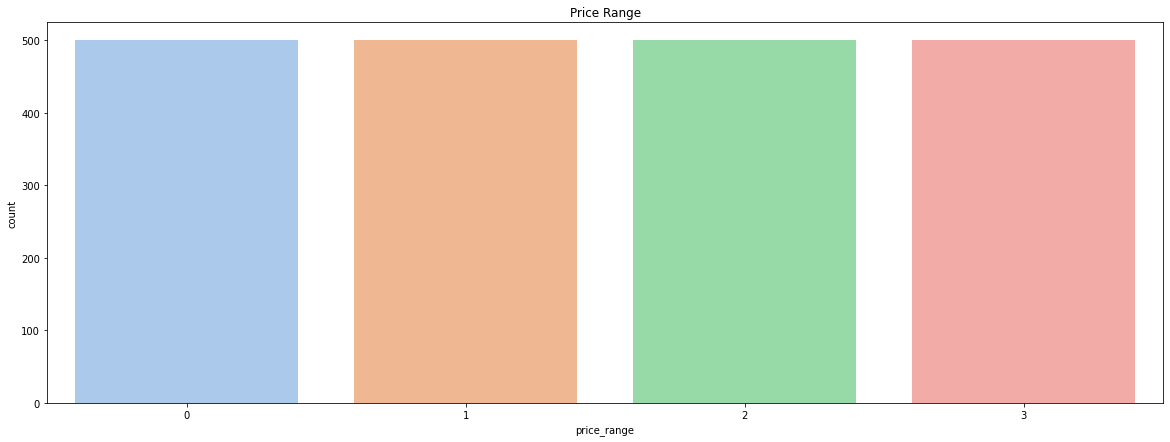

In [ ]:
#Count plot for Price_range distribution
plt.figure(figsize=(20,7))

sns.countplot(df["price_range"]).set_title("Price Range")
plt.show()

**Distribution of Categorical Features**

In [ ]:
# Value counts for each categorical feature

for count in categorical_columns:
  print(f'{count.title()}\n',df[count].value_counts())
  print("----"*30)

Dual_Sim
 1    1019
0     981
Name: dual_sim, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Wifi
 1    1014
0     986
Name: wifi, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Blue
 0    1010
1     990
Name: blue, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Touch_Screen
 1    1006
0     994
Name: touch_screen, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Three_G
 1    1523
0     477
Name: three_g, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Four_G
 1    1043
0     957
Name: four_g, dtype: int64
-------------------------------------------------------

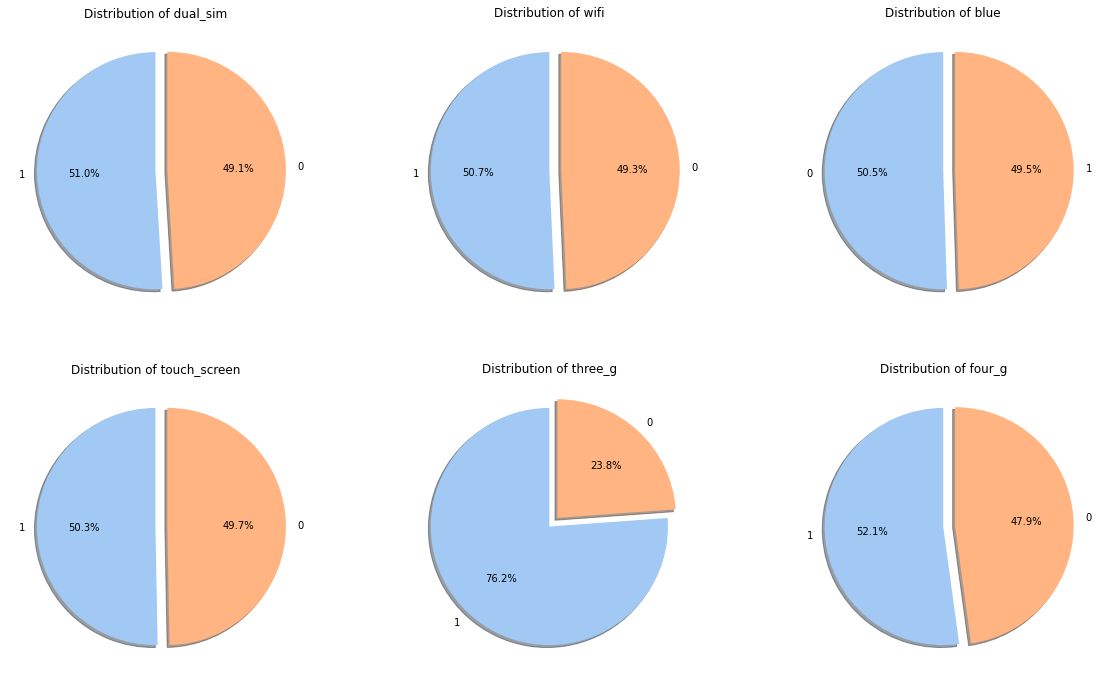

In [ ]:
# Plotting Pie chart for our Categorical columns variables

plt.figure(figsize=(20,12))
count = 0

for feature in categorical_columns:
    
    explode = [0, 0.1]
    
    labels = df[feature].value_counts().index
    sizes = df[feature].value_counts().values  
    
    plt.subplot(2,3,count+1)
    plt.pie(sizes, labels=labels, explode = explode, shadow = True, startangle=90, autopct='%1.1f%%')
    plt.title(f'Distribution of {categorical_columns[count]}', color = 'black',fontsize = 12)
    count += 1

**Distribution of Numerical Columns**

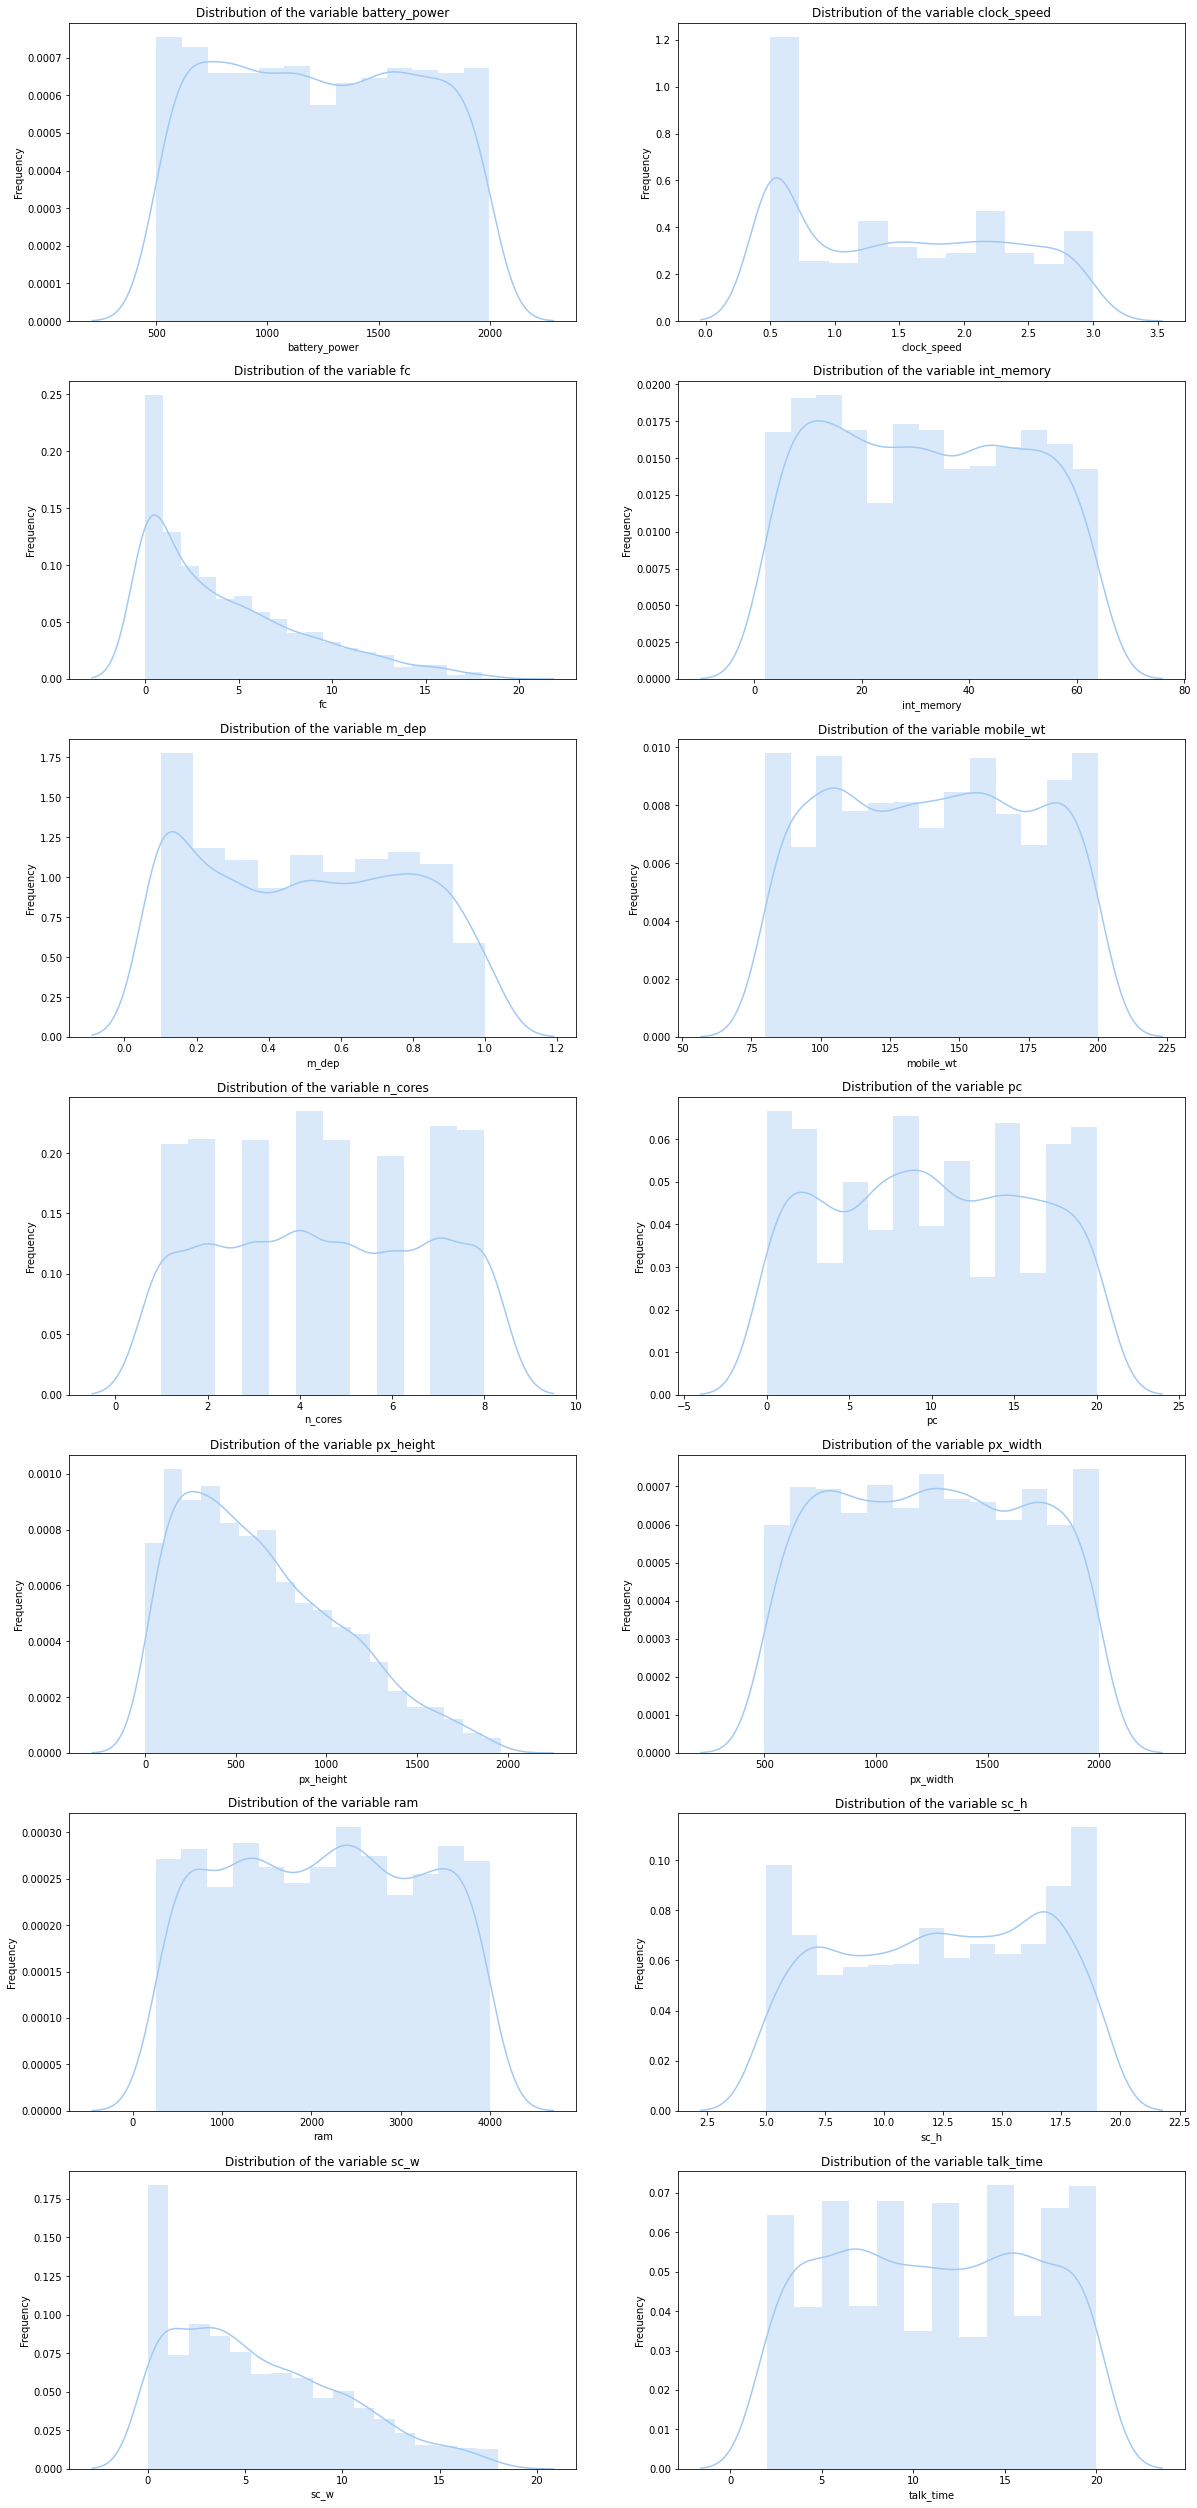

In [ ]:
# Distribution of the Numerical features
count = 1
plt.subplots(figsize=(20,45))
for feature in numerical_columns:
  plt.subplot(7,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=12)
  plt.xlabel(f"{feature}")
  plt.ylabel("Frequency")
  count += 1
     

## **Bivariate Analysis**

**Distribution of Categorical Features with the Target varibale i.e, Price Range** 

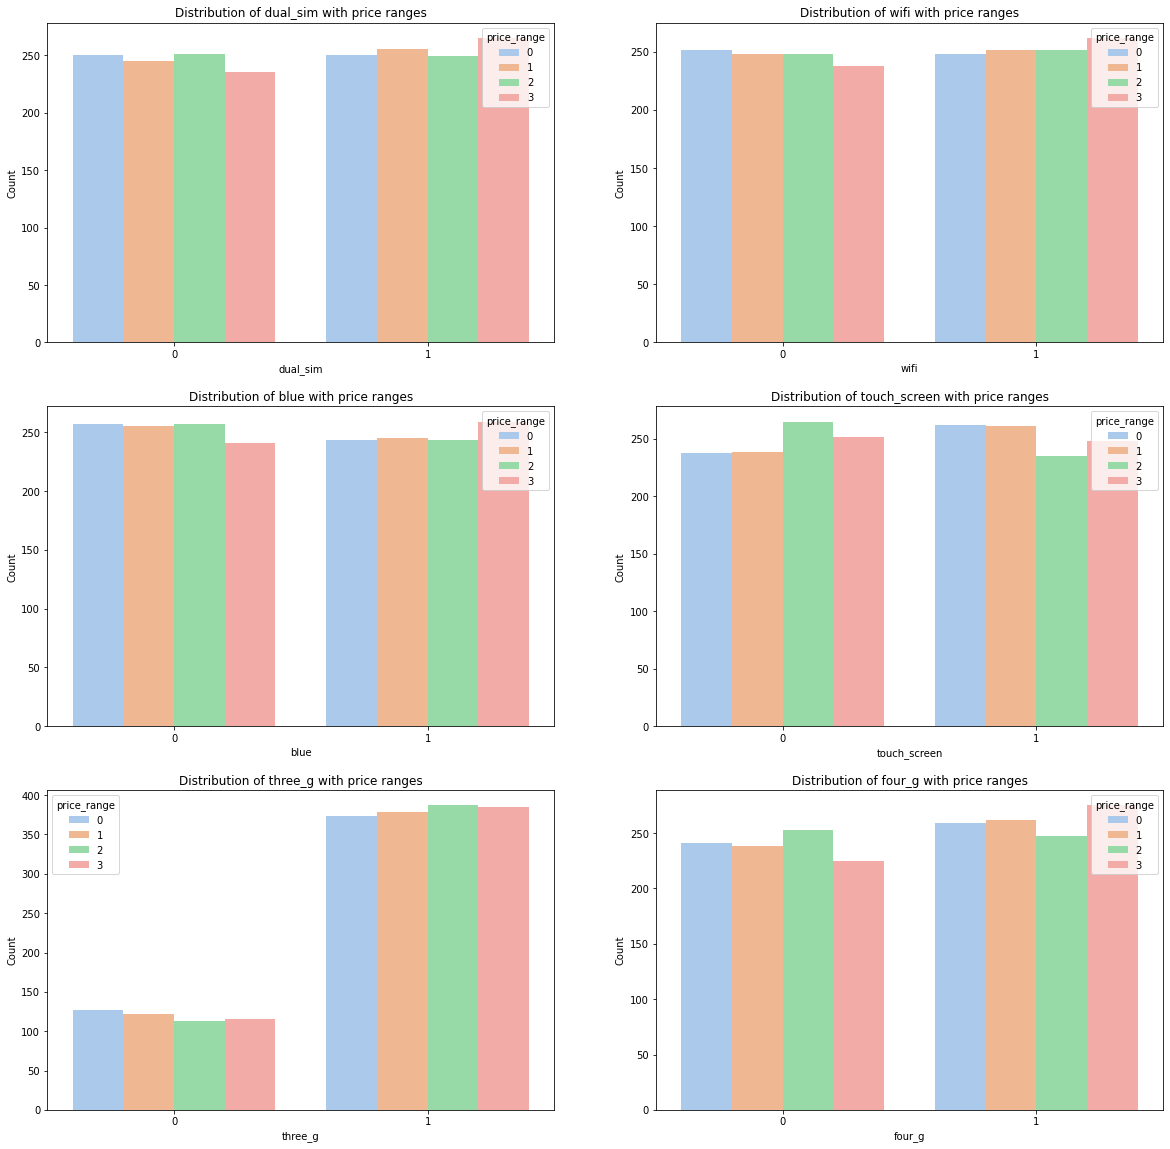

In [ ]:
#Distribution of Categorical Columns vs Price Range
count = 1
plt.subplots(figsize=(20,20))
for feature in categorical_columns:
  plt.subplot(3,2,count)
  sns.countplot(df[feature], hue = df['price_range'])
  plt.title(f"Distribution of {feature} with price ranges", fontsize=12)
  plt.xlabel(f"{feature}")
  plt.ylabel("Count")
  count += 1

**Distribution of Numerical Features with the Target varibale i.e, Price Range**

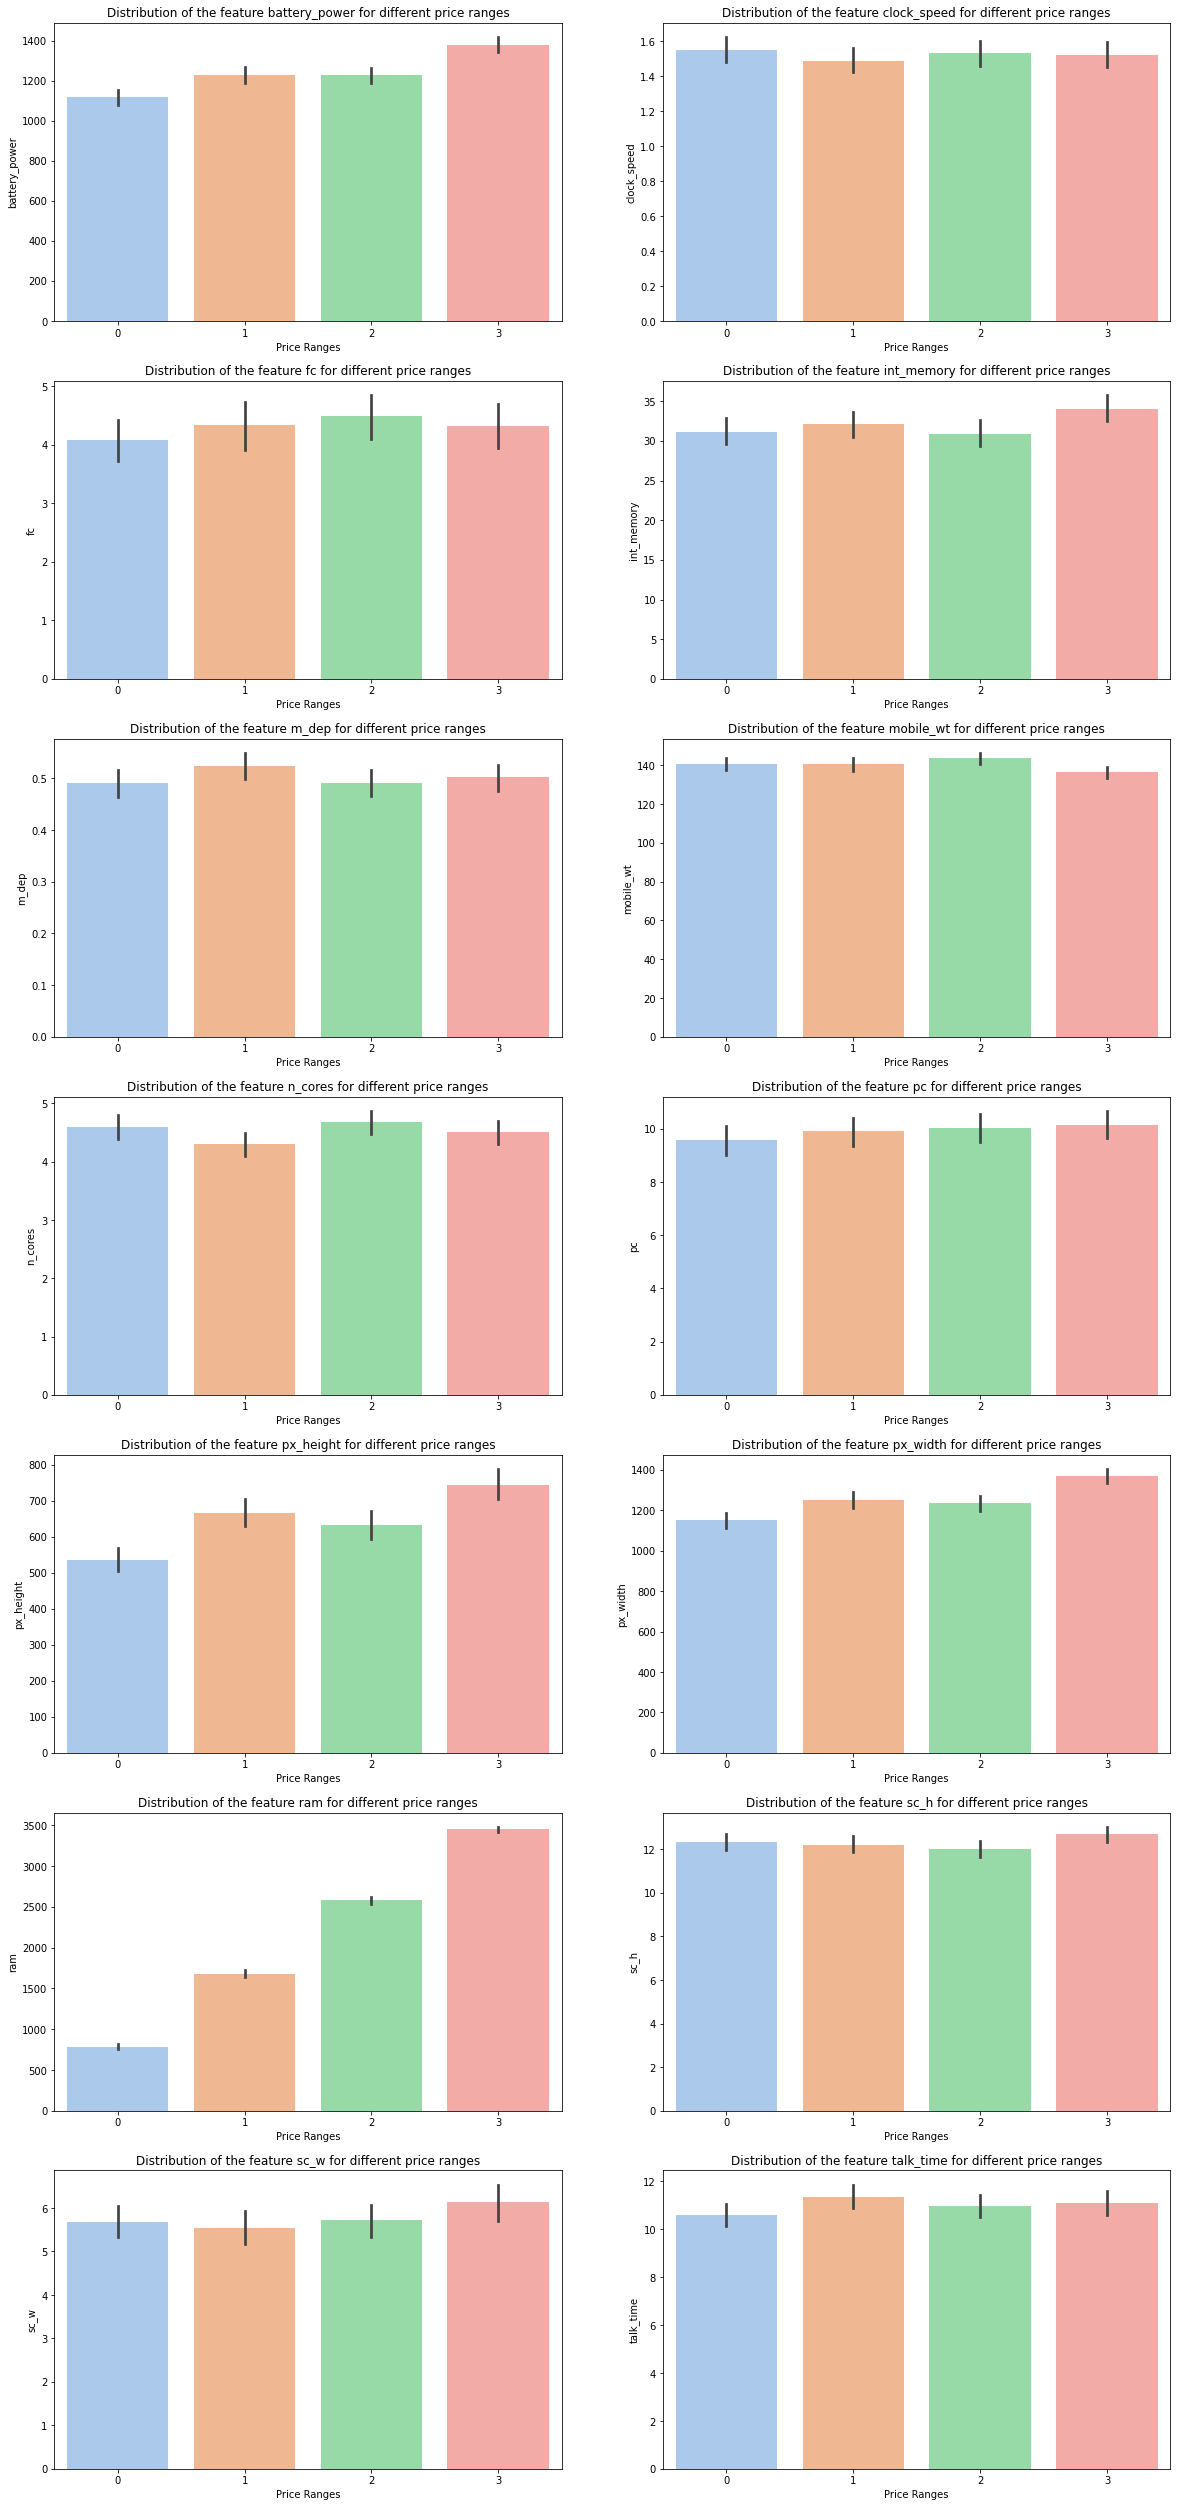

In [ ]:
#Distribution of Numerical Columns VS Price Range
count = 1
plt.subplots(figsize=(20,45))
for feature in numerical_columns:
  plt.subplot(7,2,count)
  sns.barplot(y = df[feature], x = df['price_range'])
  plt.title(f"Distribution of the feature {feature} for different price ranges", fontsize=12)
  plt.xlabel("Price Ranges")
  plt.ylabel(f'{feature}')
  count += 1

## **Multivariate Analysis**

**Distribution of camera placement i.e front,primary or both vs megapixels.**

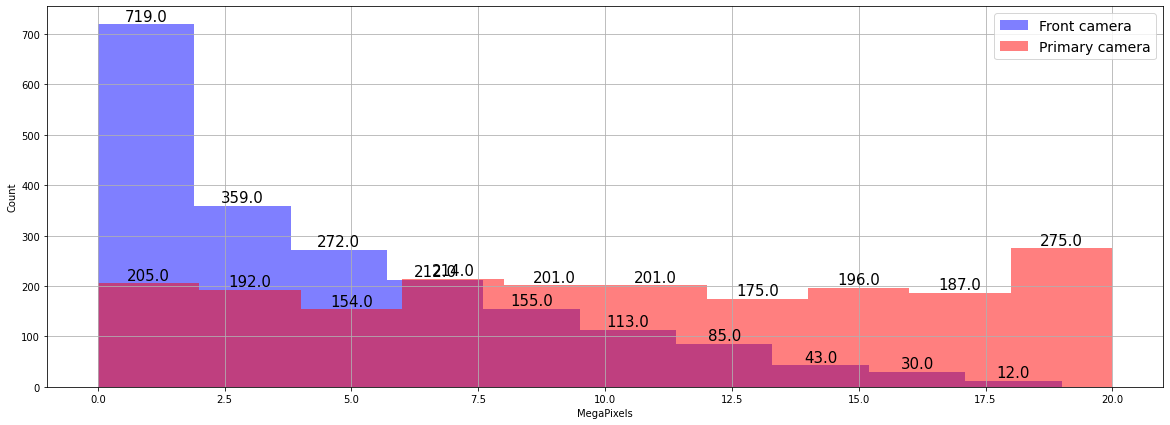

In [ ]:
# Histogram determining the number of mobiles present based on its camera placement i.e, front,primary or both vs megapixel

plt.figure(figsize=(20,7))
ax = df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend(fontsize=14)
plt.xlabel('MegaPixels')
plt.ylabel('Count')

# Adding annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

**Distribution of RAM vs Price_Range on the based on presence of Touch Screen or Not**

<Figure size 1440x504 with 0 Axes>

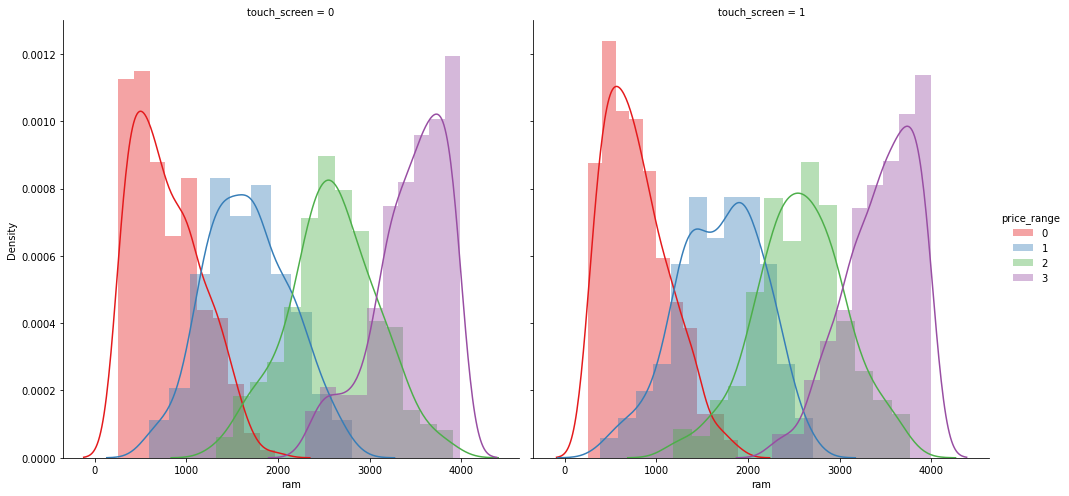

In [ ]:
# Distribution plot determining the Distribution of RAM vs Price_Range on the based on presence of Touch Screen or Not.

plt.figure(figsize=(20,7))
Touch_ram = sns.FacetGrid(df, col="touch_screen", hue="price_range", palette="Set1",height = 7)                   
Touch_ram = (Touch_ram.map(sns.distplot, "ram").add_legend())
plt.show()

## **Checking Outliers for Numerical Columns.**

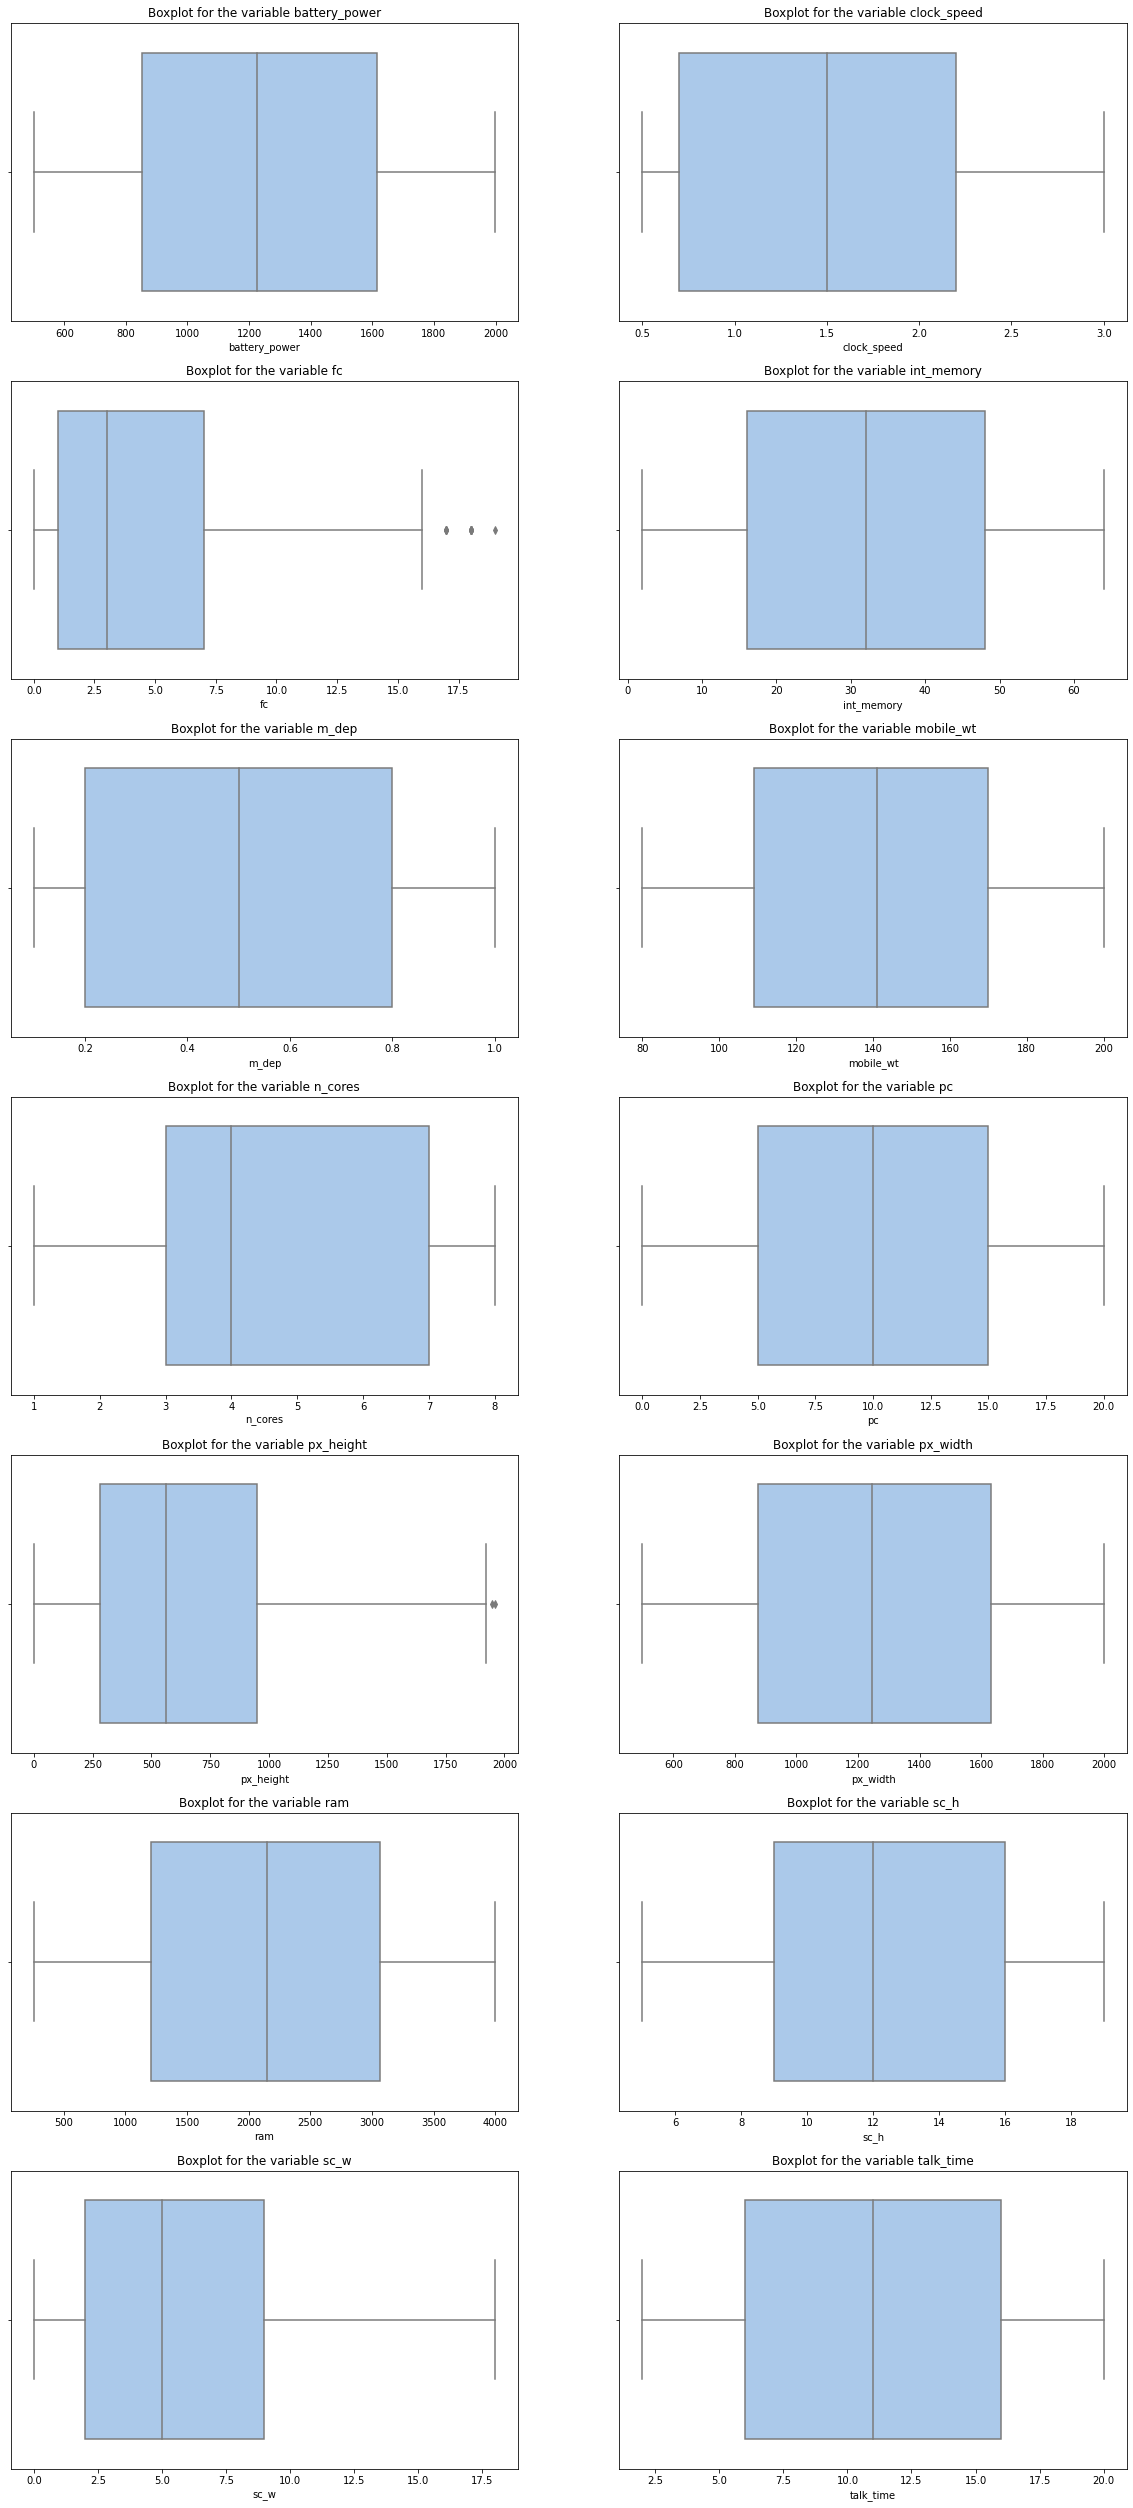

In [ ]:
# Boxplots for checking outliers in numerical features

count = 1
plt.subplots(figsize=(20,45))

for feature in numerical_columns:
  plt.subplot(7,2,count)
  sns.boxplot(df[feature])
  plt.title(f"Boxplot for the variable {feature}", fontsize=12)
  plt.xlabel(f"{feature}")
  count += 1

## **Correlation Heatmap**

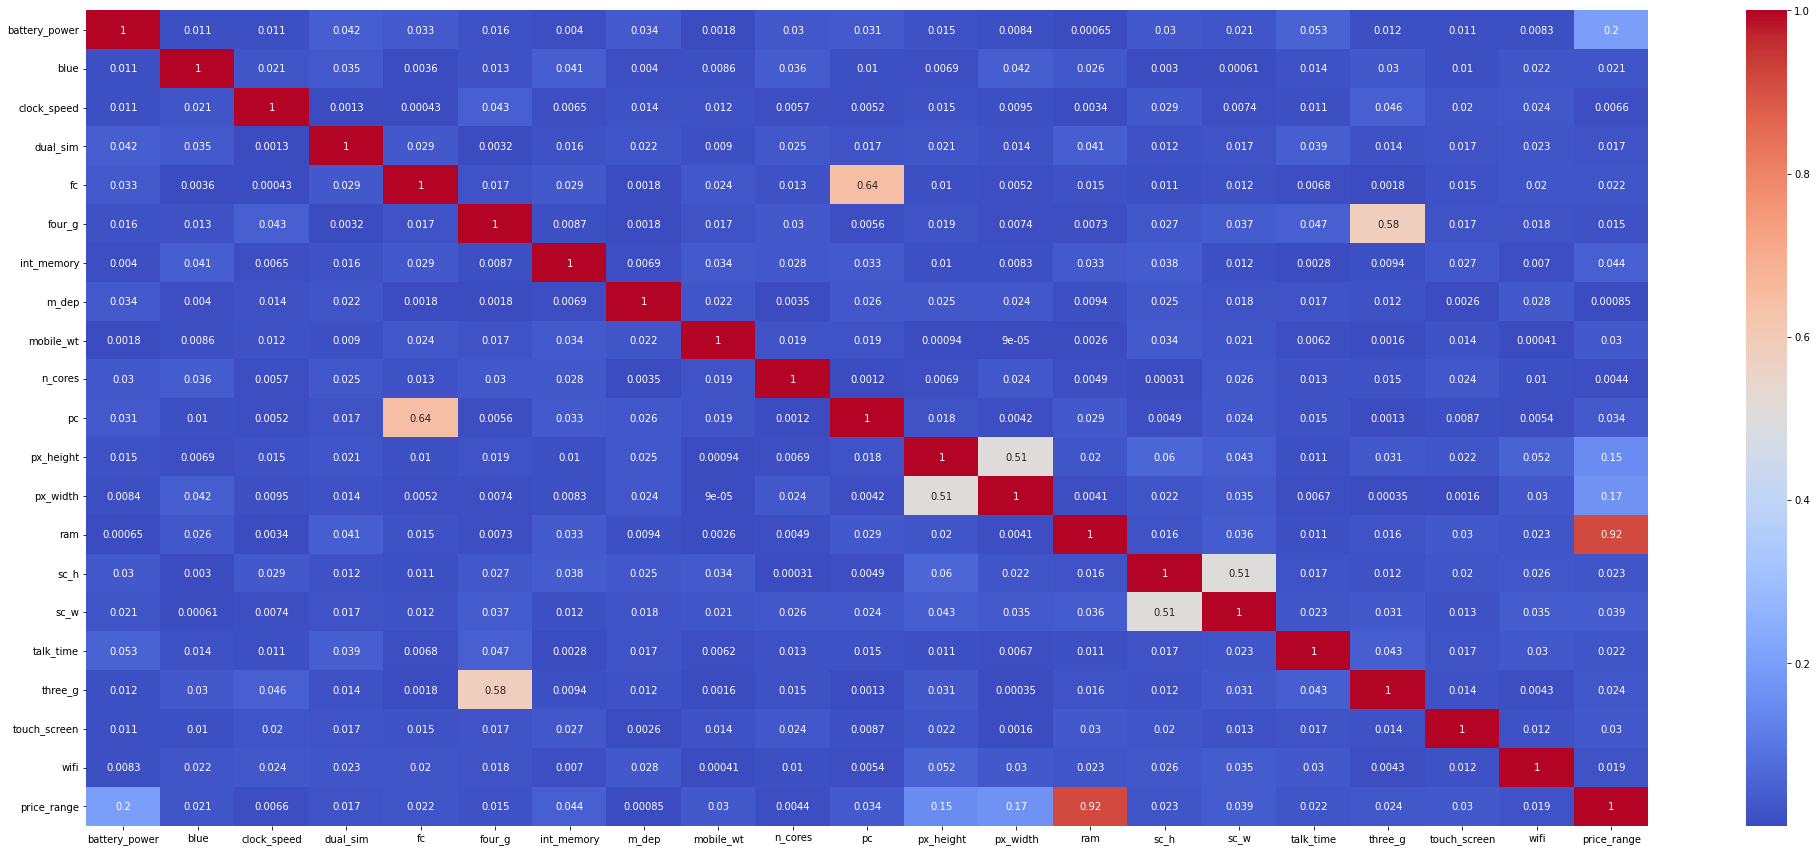

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(35,15))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

**Using VIF to cross check multicollinearity for all the columns to get the best features selected**

In [ ]:
#Multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.columns if i not in ["price_range"]]])  #calling the vif function

,variables,VIF
0,battery_power,8.076717
1,blue,1.981927
2,clock_speed,4.260479
3,dual_sim,2.015006
4,fc,3.413529
5,four_g,3.194321
6,int_memory,3.961239
7,m_dep,3.911115
8,mobile_wt,12.972548
9,n_cores,4.646070


# **Different ML Model Implementation**

## **Train Test Split**

**Data Preparation for train test split**

In [ ]:
# create the set of dependent and independent variables
X = df.drop(labels='price_range', axis=1)
Y = df['price_range']

# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {X.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {Y.shape} respectively.")

The Number of Rows and Columns in X is (2000, 20) respectively.
The Number of Rows and Columns in Y is (2000,) respectively.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 42)
                                                    

In [ ]:
# Getting the shape of Train Test set.

print("Training Dataset Shape")
print("X_train shape ", X_train.shape)
print("Y_train shape ", Y_train.shape)
print("----"*10)
print("Testing Dataset Shape")
print("X_test shape ",X_test.shape)
print("Y_test shape ",Y_test.shape)

Training Dataset Shape
X_train shape  (1600, 20)
Y_train shape  (1600,)
----------------------------------------
Testing Dataset Shape
X_test shape  (400, 20)
Y_test shape  (400,)


**Feature Scaling**

In [ ]:
#importing standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)                     
X_test = scaler.transform(X_test)

**Creating a Function for evaluation of Models.**

In [ ]:
# Creating a function to calculate the metrics for evaluating the performance of models.

def evaluation_model(y_actual,y_pred):

  '''
  This function will calculate  diffrent metrics for evaluating 
  the perfomance of models
  '''
  list_of_scores=[]
  #Accuracy 
  Accuracy =  accuracy_score(y_actual,y_pred)
  print(f'Accuracy : {Accuracy}')
    
  #Recall
  Recall  = recall_score(y_actual,y_pred,average='weighted')
  print(f"Recall : {Recall}")

  #precision
  Precision = precision_score(y_actual,y_pred,average='weighted')
  print(f"Precision : {Precision}")
 
  #f1 score
  F1 = f1_score(y_actual,y_pred,average='weighted')
  print(f"F1 : {F1}")

  #
  # ROC_AUC_Score = roc_auc_score(y_actual, y_pred, multi_class='ovo',average='weighted')
  # print(f"ROC_AUC : {ROC_AUC_Score}")


**Creating a Function for Confusion Matrix**

In [ ]:
# Creating a function for understanding the confusion matrix.

def confuse_matrix(actual, predicted):
  labels = ['0','1','2','3']
  cm = confusion_matrix(actual, predicted)
  print(cm)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)

  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  

## **Implementing Logistic Regression Model**

.....LOGISTIC REGRESSION.....


Evaluation metrices for the Training Data


Accuracy : 0.975625
Recall : 0.975625
Precision : 0.9755900316945153
F1 : 0.9755884757691508


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.975
Recall : 0.975
Precision : 0.9759457776352783
F1 : 0.9750198554444309


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[391   4   0   0]
 [  8 394   7   0]
 [  0   7 393   8]
 [  0   0   5 383]]


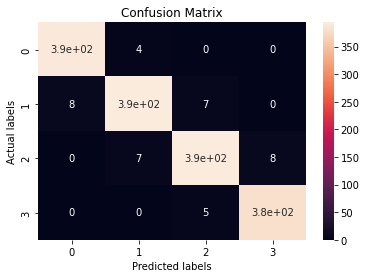

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]


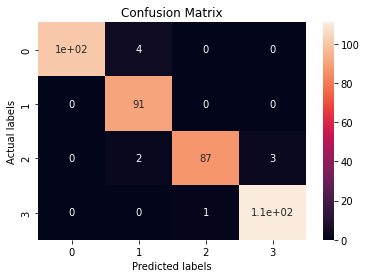

<Figure size 432x288 with 0 Axes>

In [ ]:
# logistic regression implementation

print(".....LOGISTIC REGRESSION.....")
print('\n')

log_reg = LogisticRegression(multi_class='multinomial')
log_reg.fit(X_train, Y_train)

# Predictions of Training and Testing Dasets

log_reg_pred_train = log_reg.predict(X_train)   # Prediction for train dataset
log_reg_pred_test = log_reg.predict(X_test)     # Prediction for test dataset

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,log_reg_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,log_reg_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,log_reg_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,log_reg_pred_test)
plt.figure()
plt.show()



## **Implementing Naive Bayes**

.....NAIVE BAYES.....


Evaluation metrices for the Training Data


Accuracy : 0.819375
Recall : 0.819375
Precision : 0.821118094404913
F1 : 0.8201611420871642


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.7975
Recall : 0.7975
Precision : 0.8061315603629521
F1 : 0.7994215832283195


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[355  40   0   0]
 [ 29 308  72   0]
 [  0  70 301  37]
 [  0   1  40 347]]


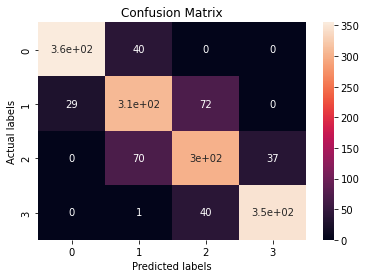

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[95 10  0  0]
 [10 62 19  0]
 [ 0  9 71 12]
 [ 0  0 21 91]]


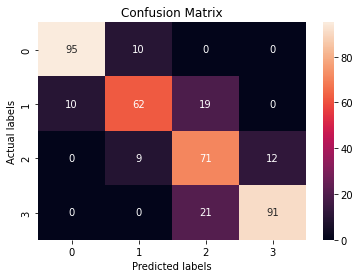

<Figure size 432x288 with 0 Axes>

In [ ]:
# Naive Bayes implementation
from sklearn.naive_bayes import GaussianNB

print(".....NAIVE BAYES.....")
print('\n')

NB = GaussianNB()
NB.fit(X_train, Y_train)

# Predictions of Training and Testing Dasets

NB_pred_train = NB.predict(X_train)   # Prediction for train dataset
NB_pred_test = NB.predict(X_test)     # Prediction for test dataset

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,NB_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,NB_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,NB_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,NB_pred_test)
plt.figure()
plt.show()

## **Implementing KNN Model**
(with Hyperparameter Tuning)

.....KNearestNeighbour.....


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................leaf_size=40, n_neighbors=8; total time=   0.0s
[CV] END ........................leaf_size=40, n_neighbors=8; total time=   0.0s
[CV] END ........................leaf_size=40, n_neighbors=8; total time=   0.0s
[CV] END ........................leaf_size=40, n_neighbors=8; total time=   0.0s
[CV] END ........................leaf_size=40, n_neighbors=8; total time=   0.0s
[CV] END .......................leaf_size=45, n_neighbors=10; total time=   0.0s
[CV] END .......................leaf_size=45, n_neighbors=10; total time=   0.0s
[CV] END .......................leaf_size=45, n_neighbors=10; total time=   0.1s
[CV] END .......................leaf_size=45, n_neighbors=10; total time=   0.0s
[CV] END .......................leaf_size=45, n_neighbors=10; total time=   0.0s
[CV] END ........................leaf_size=25, n_neighbors=4; total time=   0.0s
[CV] END .........

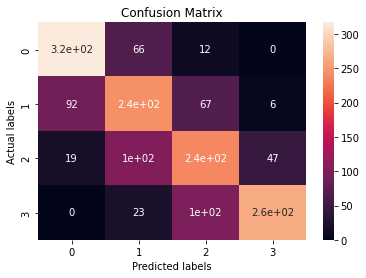

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[80 19  6  0]
 [27 39 20  5]
 [ 7 33 40 12]
 [ 1 10 38 63]]


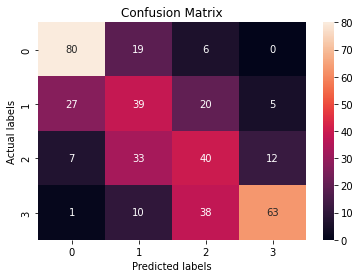

<Figure size 432x288 with 0 Axes>

In [ ]:
# KNN implementation
from sklearn.neighbors import KNeighborsClassifier


print(".....KNearestNeighbour.....")
print('\n')

KNN = KNeighborsClassifier()

# Selecting Hyperparameters
params_dict = {
              'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                'leaf_size': [20,25,30,35,40,45,50]
              }

# Using Randomized Search CV
KNN_model = RandomizedSearchCV(estimator = KNN,
                       param_distributions= params_dict,
                       cv = 5, verbose=2, scoring='accuracy')

KNN_model.fit(X_train,Y_train)

print(KNN_model.best_estimator_)    # Getting the best Estimator
print("\n")
KNN_optimal = KNN_model.best_estimator_


# Predictions of Training and Testing Dasets

KNN_pred_train = KNN_optimal.predict(X_train)   # Prediction for train dataset
KNN_pred_test = KNN_optimal.predict(X_test)     # Prediction for test dataset



# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,KNN_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,KNN_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,KNN_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,KNN_pred_test)
plt.figure()
plt.show()

## **Implementing Random Forest Model** 
(with Hyperparameter Tuning)

.....Random Forest Classifier.....


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.3

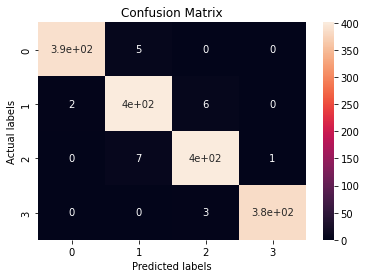

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[101   4   0   0]
 [  7  76   8   0]
 [  0   7  78   7]
 [  0   0  13  99]]


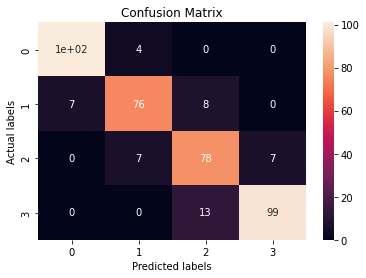

<Figure size 432x288 with 0 Axes>

In [ ]:
# Random Forest with Hyperparameter tuning implementation
from sklearn.ensemble import RandomForestClassifier

print(".....Random Forest Classifier.....")
print('\n')

Ran_For = RandomForestClassifier()

# Selecting Hyperparameters
params_dict = {
              'max_depth': [5,6,7,8,9,10],
              'min_samples_leaf': [1,2,3,4,5],
              'min_samples_split': [5,10,15],
              'n_estimators': [100,200,300]
              }

# Using Randomized Search CV
Ran_for_model = RandomizedSearchCV(estimator = Ran_For,
                       param_distributions= params_dict,
                       cv = 5, verbose=2, scoring='accuracy')

Ran_for_model.fit(X_train,Y_train)

print(Ran_for_model.best_estimator_)    # Getting the best Estimator
print("\n")
Ran_for_optimal = Ran_for_model.best_estimator_


# Predictions of Training and Testing Dasets

Ran_for_pred_train = Ran_for_optimal.predict(X_train)   # Prediction for train dataset
Ran_for_pred_test = Ran_for_optimal.predict(X_test)     # Prediction for test dataset

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,Ran_for_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,Ran_for_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,Ran_for_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,Ran_for_pred_test)
plt.figure()
plt.show()

## **Implementing XGBoost Model**
(with Hyperparameter Tuning)

.....Extreme Gradient Boosting Classifier.....


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samp

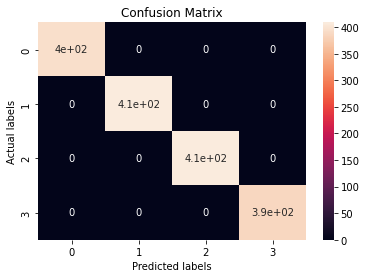

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[ 99   6   0   0]
 [  3  86   2   0]
 [  0   6  80   6]
 [  0   0  12 100]]


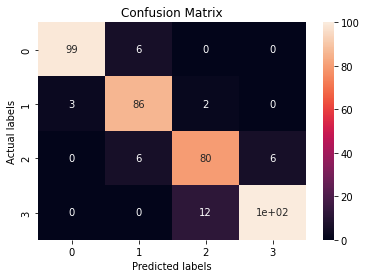

<Figure size 432x288 with 0 Axes>

In [ ]:
# XGBoost with Hyperparameter tuning implementation
from xgboost import XGBClassifier

print(".....Extreme Gradient Boosting Classifier.....")
print('\n')

XGB = XGBClassifier()

# Selecting Hyperparameters
params_dict = {
              'max_depth': [5,6,7,8,9,10],
              'min_samples_leaf': [1,2,3,4,5],
              'min_samples_split': [5,10,15],
              'n_estimators': [100,200,300],
              'learning_rate': [0.01,0.05,0.1,0.5]
              }

# Using Randomized Search CV
XGB_model = RandomizedSearchCV(estimator = XGB,
                       param_distributions= params_dict,
                       cv = 5, verbose=2, scoring='accuracy')

XGB_model.fit(X_train,Y_train)

print(XGB_model.best_estimator_)    # Getting the best Estimator
print("\n")
XGB_optimal = XGB_model.best_estimator_


# Predictions of Training and Testing Dasets

XGB_pred_train = XGB_optimal.predict(X_train)   # Prediction for train dataset
XGB_pred_test = XGB_optimal.predict(X_test)     # Prediction for test dataset

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,XGB_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,XGB_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,XGB_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,XGB_pred_test)
plt.figure()
plt.show()

## **Implementing SVM Model**
(with Hyperparameter Tuning)

.....Support Vector Machine Classifier.....


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.6s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.8s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.8s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.8s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.8s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.8s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.8s
[C

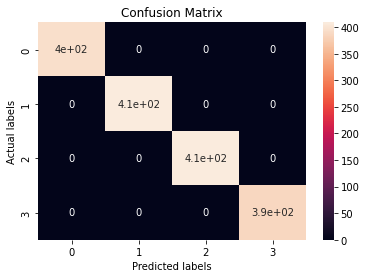

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[97  8  0  0]
 [ 6 73 12  0]
 [ 0 14 73  5]
 [ 0  0 13 99]]


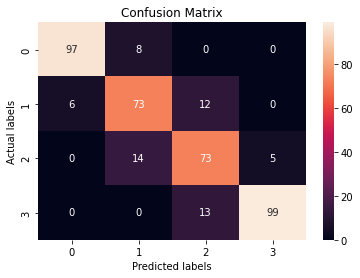

<Figure size 432x288 with 0 Axes>

In [ ]:
# SVM with Hyperparameter tuning implementation
from sklearn.svm import SVC

print(".....Support Vector Machine Classifier.....")
print('\n')

SVM = SVC(decision_function_shape = 'ovo', probability = True)

# Selecting Hyperparameters
params_dict = {'C': [0.01,0.1,1,10,100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf','poly','sigmoid']}

# Using Randomized Search CV
SVM_model = RandomizedSearchCV(estimator = SVM,
                       param_distributions= params_dict,
                       cv = 5, verbose=2, scoring='accuracy')

SVM_model.fit(X_train,Y_train)

print(SVM_model.best_estimator_)    # Getting the best Estimator
print("\n")
SVM_optimal = SVM_model.best_estimator_


# Predictions of Training and Testing Dasets

SVM_pred_train = SVM_optimal.predict(X_train)   # Prediction for train dataset
SVM_pred_test = SVM_optimal.predict(X_test)     # Prediction for test dataset

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,SVM_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,SVM_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,SVM_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,SVM_pred_test)
plt.figure()
plt.show()

## Comparing Matrices of all the Models.

In [ ]:
# Dictionary to store Logistic Regression Evaluation Matrices
dict_log_reg =  {'Model' : 'Logistic Regression', 
              'Accuracy Score' : round(accuracy_score(Y_test, log_reg_pred_test),4), 
              'Recall' : round(recall_score(Y_test, log_reg_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, log_reg_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, log_reg_pred_test,average='weighted'),4)
              }

# Dictionary to store Naive Bayes Evaluation Matrices
dict_NB =  {'Model' : 'Naive Bayes', 
              'Accuracy Score' : round(accuracy_score(Y_test, NB_pred_test),4), 
              'Recall' : round(recall_score(Y_test, NB_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, NB_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, NB_pred_test,average='weighted'),4)
              } 

# Dictionary to store KNN Evaluation Matrices
dict_KNN =  {'Model' : 'KNN', 
              'Accuracy Score' : round(accuracy_score(Y_test, KNN_pred_test),4), 
              'Recall' : round(recall_score(Y_test, KNN_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, KNN_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, KNN_pred_test,average='weighted'),4)
              }  

# Dictionary to store Random Forest Evaluation Matrices
dict_Ran_for =  {'Model' : 'Random Forest', 
              'Accuracy Score' : round(accuracy_score(Y_test, Ran_for_pred_test),4), 
              'Recall' : round(recall_score(Y_test, Ran_for_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, Ran_for_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, Ran_for_pred_test,average='weighted'),4)
              }

# Dictionary to store XGBoost Evaluation Matrices
dict_XGBoost =  {'Model' : 'XGBoost', 
              'Accuracy Score' : round(accuracy_score(Y_test, XGB_pred_test),4), 
              'Recall' : round(recall_score(Y_test, XGB_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, XGB_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, XGB_pred_test,average='weighted'),4)
              }

# Dictionary to store SVM Evaluation Matrices
dict_SVM =  {'Model' : 'SVM', 
              'Accuracy Score' : round(accuracy_score(Y_test, SVM_pred_test),4), 
              'Recall' : round(recall_score(Y_test, SVM_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, SVM_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, SVM_pred_test,average='weighted'),4)
              }

# Data Frame storing the Matrices of all the Models 
models_df = pd.DataFrame([dict_log_reg,dict_NB,dict_KNN,dict_Ran_for,dict_XGBoost,dict_SVM])
models_df.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)
models_df

,Model,Accuracy Score,Recall,Precision,F1
0,Logistic Regression,0.9750,0.9750,0.9759,0.9750
4,XGBoost,0.9125,0.9125,0.9143,0.9129
3,Random Forest,0.8850,0.8850,0.8869,0.8854
5,SVM,0.8550,0.8550,0.8599,0.8568
1,Naive Bayes,0.7975,0.7975,0.8061,0.7994
2,KNN,0.5550,0.5550,0.5794,0.5610


# **Conclusion:**




*   Data Wrangling and Data Visualization has provided the best idea about the features involved in the datset.

*   We are fortunate that the dataset was almost a cleaned one with no null values present or duplicate records found, it helped in maintaining the correct pace.

*   Most of the categorical features had a similar distribution or count except the feature 'three_g'. There were very few records for mobile phones which doesn't support 3G. 

*   Most of the numerical features followed an uniform distribution except few features like front camera, pixel resolution height and screen width which had a right skewed distribution.

*   **Based on to our main objective to predict the Mobile Price Range. Logistic Regression is the best performing model, out off all the other models used  namely Naive bayes, Knn, Random Forest,XGBoost and SVM.**

*   Knn model is the worst performing models for our dataset

*   Tree based models (XGBoost and Random Forest in our case) are by far good performing models while dealing with our dataset because of its ability to stay insulated from the effect of worst performing features. Random Forest Classifier and XGBoost when applied with cross validation and hyperparameter tuning give far better results.



